In [1]:
import nilearn
import pandas as pd
import numpy as np
import os

In [2]:
data = pd.read_csv('./data/participants.csv')

In [3]:
data.tail(10)

,id,age,gender,diagnosis,study
326,A00037495,49,M,Control,cobre
327,A00037564,50,M,Control,cobre
328,A00037619,55,M,Schizophrenia_Strict,cobre
329,A00037649,40,F,Schizophrenia_Strict,cobre
330,A00037665,43,M,Control,cobre
331,A00037007,60,M,Control,cobre
332,A00037854,21,M,Schizophrenia_Strict,cobre
333,A00038172,30,M,Schizoaffective,cobre
334,A00038441,52,M,Schizophrenia_Strict,cobre
335,A00038624,45,M,Schizophrenia_Strict,cobre


In [4]:
subjects = os.listdir('./data/images/Control')\
           + os.listdir('./data/images/Schizoaffective')\
           + os.listdir('./data/images/Schizophrenia')\
           + os.listdir('./data/images/Schizophrenia_Strict')

In [5]:
for i in range(len(subjects)):
    subjects[i] = subjects[i][4:-30]

In [6]:
%%bash
mkdir ./data/atlas
mkdir ./data/atlas/connectome
mkdir ./data/atlas/time_series

mkdir ./data/atlas/connectome/Control
mkdir ./data/atlas/connectome/Schizoaffective
mkdir ./data/atlas/connectome/Schizophrenia
mkdir ./data/atlas/connectome/Schizophrenia_Strict

mkdir ./data/atlas/time_series/Control
mkdir ./data/atlas/time_series/Schizoaffective
mkdir ./data/atlas/time_series/Schizophrenia
mkdir ./data/atlas/time_series/Schizophrenia_Strict

In [7]:
from nilearn import plotting

dataset = nilearn.datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm', symmetric_split=True)
atlas = dataset.maps
labels = dataset.labels

/opt/miniconda-latest/envs/neuro/lib/python3.6/site-packages/nilearn/datasets/__init__.py:89: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


In [8]:
len(labels)

97

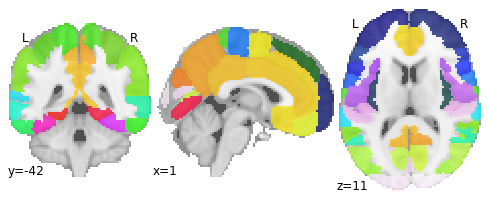

In [9]:
plotting.plot_roi(atlas, draw_cross=False)

In [10]:
from nilearn.input_data import NiftiLabelsMasker

masker = NiftiLabelsMasker(labels_img=atlas, standardize=True, memory='nilearn_cache', verbose=1)

In [11]:
from nilearn.connectome import ConnectivityMeasure

correlation_measure = ConnectivityMeasure(kind='correlation')

In [12]:
%%time

with open('./data/atlas/labels.txt', 'w') as output:
    output.write(str(labels))

for index, row in data.iterrows():
    type_ = ''
    
    if row['diagnosis'] == 'Control':
        type_ = 'Control'
    
    elif row['diagnosis'] == 'Schizoaffective':
        type_ = 'Schizoaffective'
        
    elif row['diagnosis'] == 'Schizophrenia':
        type_ = 'Schizophrenia'
        
    elif row['diagnosis'] == 'Schizophrenia_Strict':
        type_ = 'Schizophrenia_Strict'
        
    file = './data/images/'+type_+'/sub-'+row['id']+'_task-rest_bold_MNI_3mm.nii.gz'
    time_series = masker.fit_transform(file)
    correlation_matrix = correlation_measure.fit_transform([time_series])[0]
    np.savez_compressed('./data/atlas/connectome/'+type_+'/sub-'+row['id'], correlation_matrix)
    np.savez_compressed('./data/atlas/time_series/'+type_+'/sub-'+row['id'], time_series)

[NiftiLabelsMasker.fit_transform] loading data from Nifti1Image('/home/neuro/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cortl-maxprob-thr25-2mm.nii.gz')
Resampling labels
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-10159_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe02ccc9320>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Mem

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-10227_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe028ab6a58>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Control/sub-10227_task-rest_bold_MNI_3mm.nii.gz
[Ni

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-10273_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe037a278d0>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Control/sub-10273_task-rest_bold_MNI_3mm.nii.gz
[Ni

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-10316_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe037a27908>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Control/sub-10316_task-rest_bold_MNI_3mm.nii.gz
[Ni

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-10345_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe02ccc9320>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Control/sub-10345_task-rest_bold_MNI_3mm.nii.gz
[Ni

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-10377_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe028ab6c18>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Control/sub-10377_task-rest_bold_MNI_3mm.nii.gz
[Ni

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-10455_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe037a27ac8>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Control/sub-10455_task-rest_bold_MNI_3mm.nii.gz
[Ni

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-10506_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe037a27ac8>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Control/sub-10506_task-rest_bold_MNI_3mm.nii.gz
[Ni

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-10530_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe037a27ac8>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Control/sub-10530_task-rest_bold_MNI_3mm.nii.gz
[Ni

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-10629_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe037a27ac8>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Control/sub-10629_task-rest_bold_MNI_3mm.nii.gz
[Ni

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-10678_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe037a27908>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Control/sub-10678_task-rest_bold_MNI_3mm.nii.gz
[Ni

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-10704_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe037a27908>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Control/sub-10704_task-rest_bold_MNI_3mm.nii.gz
[Ni

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-10762_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe02edc1a20>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Control/sub-10762_task-rest_bold_MNI_3mm.nii.gz
[Ni

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-10871_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe037a27a90>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Control/sub-10871_task-rest_bold_MNI_3mm.nii.gz
[Ni

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-10934_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe02ccc9208>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Control/sub-10934_task-rest_bold_MNI_3mm.nii.gz
[Ni

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-10975_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe037a278d0>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Control/sub-10975_task-rest_bold_MNI_3mm.nii.gz
[Ni

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-11044_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe028aacc88>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Control/sub-11044_task-rest_bold_MNI_3mm.nii.gz
[Ni

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-11066_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe028aaccc0>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Control/sub-11066_task-rest_bold_MNI_3mm.nii.gz
[Ni

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-11097_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe037a278d0>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Control/sub-11097_task-rest_bold_MNI_3mm.nii.gz
[Ni

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-11112_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe037a278d0>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Control/sub-11112_task-rest_bold_MNI_3mm.nii.gz
[Ni

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-11149_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe028aaccc0>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Control/sub-11149_task-rest_bold_MNI_3mm.nii.gz
[Ni

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizophrenia/sub-50008_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe037a27908>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Schizophrenia/sub-50008_task-rest_bold_MNI_3m

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizophrenia/sub-50020_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe028aaccc0>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Schizophrenia/sub-50020_task-rest_bold_MNI_3m

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizophrenia/sub-50029_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe037a27908>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Schizophrenia/sub-50029_task-rest_bold_MNI_3m

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizophrenia/sub-50038_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe02ccc92e8>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Schizophrenia/sub-50038_task-rest_bold_MNI_3m

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizophrenia/sub-50051_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe02edc1a20>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Schizophrenia/sub-50051_task-rest_bold_MNI_3m

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizophrenia/sub-50058_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe02edc1a20>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Schizophrenia/sub-50058_task-rest_bold_MNI_3m

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizophrenia/sub-50067_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe02ccc90b8>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Schizophrenia/sub-50067_task-rest_bold_MNI_3m

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizophrenia/sub-50080_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe02edc1a20>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Schizophrenia/sub-50080_task-rest_bold_MNI_3m

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-A00024955_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe02edc1a20>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Control/sub-A00024955_task-rest_bold_MNI_3mm.ni

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-A00025969_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe02ccc90b8>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Control/sub-A00025969_task-rest_bold_MNI_3mm.ni

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-A00024535_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe02edc1a20>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Control/sub-A00024535_task-rest_bold_MNI_3mm.ni

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizophrenia_Strict/sub-A00016197_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe02cd52748>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Schizophrenia_Strict/sub-A00016197

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizophrenia_Strict/sub-A00023246_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe02ccc9320>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Schizophrenia_Strict/sub-A00023246

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-A00022835_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe02ccc92e8>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Control/sub-A00022835_task-rest_bold_MNI_3mm.ni

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-A00022810_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe02ccc92e8>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Control/sub-A00022810_task-rest_bold_MNI_3mm.ni

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-A00021058_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe028ab64a8>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Control/sub-A00021058_task-rest_bold_MNI_3mm.ni

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-A00020895_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe028ab6390>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Control/sub-A00020895_task-rest_bold_MNI_3mm.ni

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-A00023337_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe028ab6320>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Control/sub-A00023337_task-rest_bold_MNI_3mm.ni

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizophrenia_Strict/sub-A00001452_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe02ccc90b8>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Schizophrenia_Strict/sub-A00001452

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizophrenia_Strict/sub-A00018129_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe028abf630>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Schizophrenia_Strict/sub-A00018129

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-A00004087_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe02ccc9198>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Control/sub-A00004087_task-rest_bold_MNI_3mm.ni

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizophrenia_Strict/sub-A00002480_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe037a27908>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Schizophrenia_Strict/sub-A00002480

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizophrenia_Strict/sub-A00015648_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe037a27908>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Schizophrenia_Strict/sub-A00015648

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizophrenia_Strict/sub-A00027537_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe037a27ac8>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Schizophrenia_Strict/sub-A00027537

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizophrenia_Strict/sub-A00006754_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe028aacc88>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Schizophrenia_Strict/sub-A00006754

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizophrenia_Strict/sub-A00000368_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe037a27ac8>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Schizophrenia_Strict/sub-A00000368

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizophrenia_Strict/sub-A00009280_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe02edc1a20>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Schizophrenia_Strict/sub-A00009280

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-A00028052_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe02ccc9198>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Control/sub-A00028052_task-rest_bold_MNI_3mm.ni

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-A00023730_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe02edc1a20>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Control/sub-A00023730_task-rest_bold_MNI_3mm.ni

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizophrenia_Strict/sub-A00028405_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe02edc1a20>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Schizophrenia_Strict/sub-A00028405

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-A00029452_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe02edc1a20>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Control/sub-A00029452_task-rest_bold_MNI_3mm.ni

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Schizophrenia_Strict/sub-A00035003_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe02edc1a20>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Schizophrenia_Strict/sub-A00035003

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-A00036555_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe037a27908>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Control/sub-A00036555_task-rest_bold_MNI_3mm.ni

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-A00037318_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe02edc1a20>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Control/sub-A00037318_task-rest_bold_MNI_3mm.ni

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('./data/images/Control/sub-A00037665_task-rest_bold_MNI_3mm.nii.gz', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fe02cd6d4a8>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7fe02ce49080>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=1)
[NiftiLabelsMasker.transform_single_imgs] Loading data from data/images/Control/sub-A00037665_task-rest_bold_MNI_3mm.ni